In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
from tensorflow import keras

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 19)

In [7]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


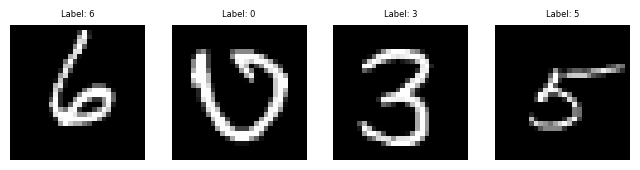

In [8]:
# вывод первых 4 изображений и их меток
plt.figure(figsize=(8, 2))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}', fontsize = 6)
    plt.axis('off')
plt.show()

In [9]:
# развертывание изображений 28x28 в вектор длиной 784 и нормализация
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') / 255

# кодирование меток по принципу one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
num_classes = y_train.shape[1]

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)


Shape of X train: (60000, 784)
Shape of y train: (60000, 10)
Shape of X test: (10000, 784)
Shape of y test: (10000, 10)


In [10]:
# создание модели однослойной нейронной сети
from keras.models import Sequential
from keras.layers import Dense

model0 = Sequential()
# добавляем выходной слой
model0.add(Dense(units=num_classes, input_dim=784, activation='softmax'))

# компиляция модели
model0.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model0.summary())


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6993 - loss: 1.1736 - val_accuracy: 0.8783 - val_loss: 0.5063
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.4869 - val_accuracy: 0.8923 - val_loss: 0.4182
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8883 - loss: 0.4198 - val_accuracy: 0.8995 - val_loss: 0.3825
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8945 - loss: 0.3879 - val_accuracy: 0.9023 - val_loss: 0.3621
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9000 - loss: 0.3696 - val_accuracy: 0.9038 - val_loss: 0.3490
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.3514 - val_accuracy: 0.9062 - val_loss: 0.3391
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.3436 - val_accuracy: 0.9077 - val_loss: 0.3313
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9064 - loss: 0.3362 - 

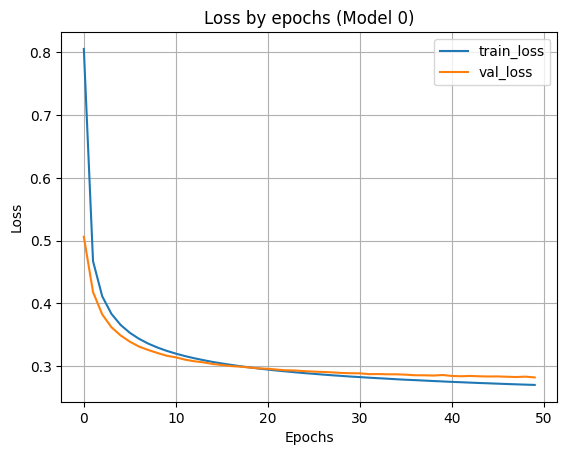

In [11]:
# обучение модели
H0 = model0.fit(X_train, y_train,
                validation_split=0.1,
                epochs=50,
                verbose=1)

# вывод графика функции ошибки
plt.plot(H0.history['loss'])
plt.plot(H0.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs (Model 0)')
plt.show()


In [12]:
# оценка качества модели на тестовых данных
scores = model0.evaluate(X_test, y_test)

print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2818
Loss on test data: 0.28366461396217346
Accuracy on test data: 0.9205999970436096


In [16]:
from keras.models import Sequential
from keras.layers import Dense

neurons = [100, 300, 500]
results = {}

for n in neurons:
    print(f'\n=== Модель со скрытым слоем {n} нейронов ===')

    # создание модели
    model = Sequential()
    model.add(Dense(units=n, input_dim=784, activation='sigmoid'))
    model.add(Dense(units=num_classes, activation='softmax'))

    # компиляция модели
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

    # обучение модели
    H = model.fit(X_train, y_train,
                  validation_split=0.1,
                  epochs=50,
                  verbose=1)  # чтобы не печатать все эпохи

    # оценка на тестовых данных
    scores = model.evaluate(X_test, y_test, verbose=1)
    results[n] = scores[1]

    print(f'Accuracy on test data: {scores[1]:.4f}')



=== Модель со скрытым слоем 100 нейронов ===
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5470 - loss: 1.8791 - val_accuracy: 0.8307 - val_loss: 0.9579
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8333 - loss: 0.8491 - val_accuracy: 0.8707 - val_loss: 0.6103
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8645 - loss: 0.5867 - val_accuracy: 0.8848 - val_loss: 0.4890
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.4860 - val_accuracy: 0.8932 - val_loss: 0.4297
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8874 - loss: 0.4331 - val_accuracy: 0.8978 - val_loss: 0.3938
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8945 - loss: 0.3998 - val_accuracy: 0.9015 - val_loss: 0.3690
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8971 - loss: 0.3753 - val_accuracy: 0.9052 - val_loss: 0.3520
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s

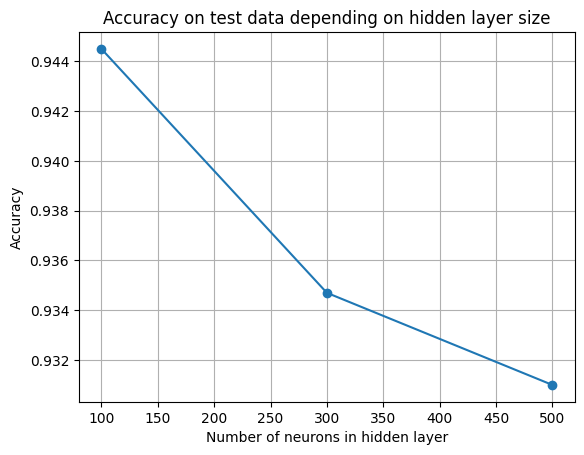

In [17]:
plt.figure()
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.grid()
plt.title('Accuracy on test data depending on hidden layer size')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Accuracy')
plt.show()


In [18]:
from keras.models import Sequential
from keras.layers import Dense

hidden2 = [50, 100]
results_2 = {}

for n2 in hidden2:
    print(f'\n=== Модель со вторым скрытым слоем {n2} нейронов ===')

    # создание модели
    model2 = Sequential()
    model2.add(Dense(units=100, input_dim=784, activation='sigmoid'))  # первый скрытый слой
    model2.add(Dense(units=n2, activation='sigmoid'))                   # второй скрытый слой
    model2.add(Dense(units=num_classes, activation='softmax'))          # выходной слой

    # компиляция модели
    model2.compile(loss='categorical_crossentropy',
                   optimizer='sgd',
                   metrics=['accuracy'])

    # обучение модели
    H2 = model2.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=50,
                    verbose=1)

    # оценка на тестовых данных
    scores = model2.evaluate(X_test, y_test, verbose=1)
    results_2[n2] = scores[1]

    print(f'Accuracy on test data: {scores[1]:.4f}')



=== Модель со вторым скрытым слоем 50 нейронов ===
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2022 - loss: 2.2940 - val_accuracy: 0.5467 - val_loss: 2.1147
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5758 - loss: 2.0123 - val_accuracy: 0.7037 - val_loss: 1.5870
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7169 - loss: 1.4299 - val_accuracy: 0.7762 - val_loss: 1.0373
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7884 - loss: 0.9641 - val_accuracy: 0.8323 - val_loss: 0.7605
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8249 - loss: 0.7300 - val_accuracy: 0.8547 - val_loss: 0.6177
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8471 - loss: 0.6081 - val_accuracy: 0.8653 - val_loss: 0.5332
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8624 - loss: 0.5334 - val_accuracy: 0.8787 - val_loss: 0.4779
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━

In [19]:
model2.save('/content/drive/MyDrive/Colab Notebooks/best_model_2x100.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


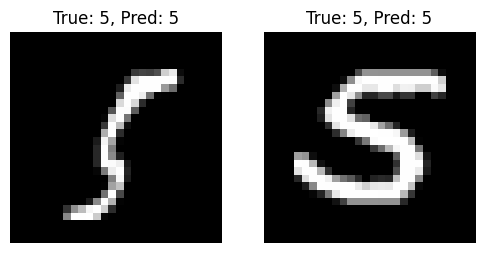

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# выбираем индексы двух случайных изображений
indices = np.random.choice(range(X_test.shape[0]), 2, replace=False)

# получаем предсказания
predictions = model2.predict(X_test[indices])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[indices], axis=1)

# вывод изображений и меток
plt.figure(figsize=(6, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}, Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()


In [23]:
from google.colab import files
uploaded = files.upload()

Saving 5.png to 5.png
Saving 6.png to 6 (1).png


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

file_names = list(uploaded.keys())

X_custom = []

for fname in file_names:
    # загружаем изображение в оттенках серого и приводим к 28×28
    img = image.load_img(fname, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)

    # инвертируем цвета, если фон белый (MNIST — белая цифра на чёрном фоне)
    img_array = 255 - img_array

    # нормализация
    img_array = img_array / 255.0

    # разворачиваем в вектор длиной 784
    img_flat = img_array.reshape(1, 784)

    X_custom.append(img_flat)

X_custom = np.vstack(X_custom)


In [25]:
predictions = model2.predict(X_custom)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


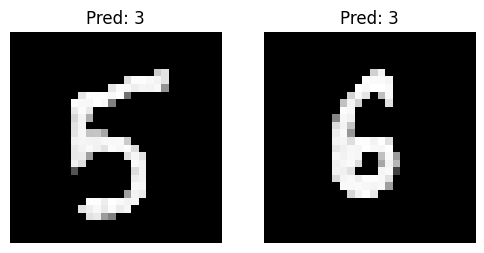

In [26]:
plt.figure(figsize=(6, 3))
for i, fname in enumerate(file_names):
    img = image.load_img(fname, color_mode='grayscale', target_size=(28, 28))
    plt.subplot(1, len(file_names), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

In [27]:
probs = model2.predict(X_custom)       # X_custom — (N,784) или (N,28,28,1)
print(probs)                           # вероятности по 10 классам
print(np.argmax(probs, axis=1))        # предсказанные классы


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.7843387e-04 2.5620324e-05 9.6879220e-03 9.8594320e-01 2.5915762e-08
  2.2038540e-03 8.8322827e-07 6.2859053e-06 1.9501867e-03 3.5526070e-06]
 [3.8881015e-04 1.2971306e-05 2.7805394e-03 9.9061769e-01 1.2557522e-08
  5.8032214e-03 7.3892338e-08 2.2987399e-05 3.7107972e-04 2.6070065e-06]]
[3 3]


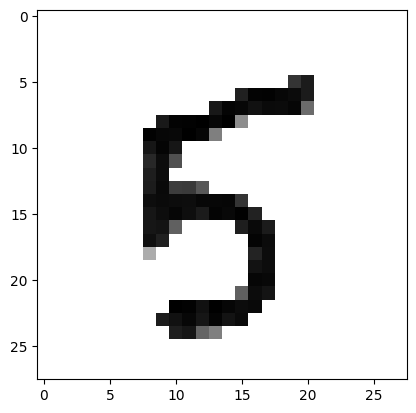

In [28]:
plt.imshow(X_custom[0].reshape(28, 28), cmap='gray')
plt.show()


In [29]:
X_custom = 1 - X_custom
predictions = model2.predict(X_custom)
print(np.argmax(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[5 6]


In [30]:
from google.colab import files
uploaded = files.upload()


Saving 6 (1).png to 6 (1) (1).png
Saving 5 (1).png to 5 (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


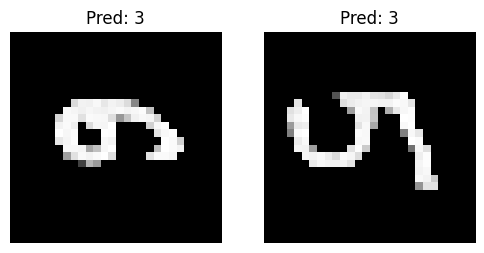

Распознанные цифры: [3 3]


In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

file_names = list(uploaded.keys())
X_rotated = []

for fname in file_names:
    # загружаем повернутое изображение и приводим к формату 28×28
    img = image.load_img(fname, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img) / 255.0   # нормализация

    # разворачиваем в вектор длиной 784
    img_flat = img_array.reshape(1, 784)
    X_rotated.append(img_flat)

X_rotated = np.vstack(X_rotated)

# инвертируем цвета (цифры — светлые, фон — тёмный)
X_rotated = 1 - X_rotated

# предсказания модели
predictions = model2.predict(X_rotated)
predicted_labels = np.argmax(predictions, axis=1)

# вывод изображений и предсказаний
plt.figure(figsize=(6, 3))
for i, fname in enumerate(file_names):
    img = image.load_img(fname, color_mode='grayscale', target_size=(28, 28))
    plt.subplot(1, len(file_names), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

print('Распознанные цифры:', predicted_labels)


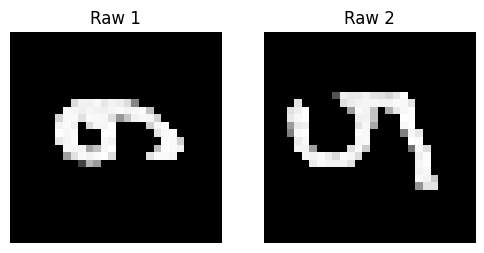

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

file_names = list(uploaded.keys())
X_rotated = []

for fname in file_names:
    # загружаем повернутое изображение и приводим к 28×28
    img = image.load_img(fname, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img) / 255.0  # нормализация

    # разворачиваем в вектор длиной 784
    img_flat = img_array.reshape(1, 784)
    X_rotated.append(img_flat)

X_rotated = np.vstack(X_rotated)

# визуально проверим, как выглядят изображения после предобработки
plt.figure(figsize=(6, 3))
for i in range(len(file_names)):
    plt.subplot(1, len(file_names), i + 1)
    plt.imshow(X_rotated[i].reshape(28, 28), cmap='gray')
    plt.title(f'Raw {i+1}')
    plt.axis('off')
plt.show()


In [34]:
# вариант 1: без инверсии
predictions_noinv = model2.predict(X_rotated)
labels_noinv = np.argmax(predictions_noinv, axis=1)

# вариант 2: с инверсией (как в оригинальных данных)
X_rotated_inv = 1 - X_rotated
predictions_inv = model2.predict(X_rotated_inv)
labels_inv = np.argmax(predictions_inv, axis=1)

print('Без инверсии:', labels_noinv)
print('С инверсией:', labels_inv)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Без инверсии: [9 9]
С инверсией: [3 3]


In [35]:
np.set_printoptions(precision=4, suppress=True)

print("\nВероятности без инверсии:")
print(predictions_noinv)

print("\nВероятности с инверсией:")
print(predictions_inv)



Вероятности без инверсии:
[[0.0053 0.     0.     0.     0.3803 0.049  0.0059 0.1609 0.001  0.3975]
 [0.105  0.     0.0139 0.0372 0.0011 0.0113 0.0001 0.1999 0.0071 0.6244]]

Вероятности с инверсией:
[[0.0003 0.     0.1308 0.8647 0.     0.0037 0.     0.     0.0006 0.    ]
 [0.0012 0.0001 0.0845 0.8197 0.     0.0825 0.     0.     0.012  0.    ]]
